# 모델 평가
모델의 성능을 평가한다. 
어떤 문제를 해결하느냐에 따라 그리고 모델의 어떤 성능을 확인하는 가에 따라 다양한 평가지표가 있다.

# 분류와 회귀의 주요 평가방법

### 분류 평가 지표
1. 정확도 (Accuracy)
1. 정밀도 (Precision)
1. 재현률 (Recall)
1. F1점수 (F1 Score)
1. PR Curve, AP score
1. ROC, AUC score

### 회귀 평가방법
1. MSE (Mean Squared Error)
1. RMSE (Root Mean Squared Error)
1. $R^2$ (결정계수)

### sckit-learn 평가함수 모듈
- sklearn.metrics 모듈에 있다.

# 분류(Classification) 평가 지표

##  이진 분류(Binary classification)
- **어떤 항목인지 아닌지를 분류한다.**
    - 환자인가?
    - 스팸메일인가? 
    - 사기 거래 인가?
- 이진 분류 양성(Positive)과 음성(Negative)
    - **양성(Positive):** 찾으려는 대상이 True이인 것. 보통 1로 표현한다.
    - **음성(Negative):** 찾으려는 대상이 False이인 것. 보통 0로 표현한다.
- 예
    - 환자인가? (검사기록을 통해 환자를 찾으려는 경우)
        - 양성(Positive): 환자, 1
        - 음성(Negative): 환자 아님(정상), 0
    - 스팸메일인가? (메일의 내용을 바탕으로 스팸메일을 찾으려는 경우.)
         - 양성(Positive): 스팸메일, 1
         - 음성(Negative): 스팸메일 아님(정상 메일), 0
    - 사기 거래 인가? (금융거래 기록을 바탕으로 금융사기 거래를 찾으려는 경우.)
         - 양성(Positive): 사기 거래, 1
         - 음성(Negative): 사기 거래 아님(정상 거래), 0
        

## 정확도 (Accuracy)
- **대표적인 분류의 평가 지표**


$$
\large{
정확도 (Accuracy) = \cfrac{맞게 예측한 건수} {전체 예측 건수}
}
$$

- 전체 예측 한 것중 맞게 예측한 비율로 평가한다.
- `accuracy_score(정답, 모델예측값)`

### Accuracy 평가지표의 문제
- 이진 분류에서 **양성(Positive)에 대한 지표만 확인 할 수 없다.** 
- 불균형 데이터의 경우 정확한 평가지표가 될 수 없다.
    - 예: 양성과 음성의 비율이 1:9 인 경우 모두 음성이라고 하면 정확도는 90%가 된다.

## MNIST Data set
- 손글씨 숫자 데이터 셋
    - 미국 국립표준연구소(NIST) 에서 수집한 손글씨 숫자(0 ~ 9) 데이터셋을 수정한 이미지 데이터셋.
- 사이킷런 제공 image size: 8 X 8 
    - 원본 데이터는 28 X 28 크기로 train 60,000장, test 10,000 장을 제공한다.
- https://ko.wikipedia.org/wiki/MNIST_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B2%A0%EC%9D%B4%EC%8A%A4

### mnist 데이터 셋 로드 및 확인

In [76]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

In [77]:
digits = load_digits()
X = digits.data
y = digits.target

X.shape, y.shape

((1797, 64), (1797,))

In [78]:
8*8

64

In [79]:
digits.feature_names

['pixel_0_0',
 'pixel_0_1',
 'pixel_0_2',
 'pixel_0_3',
 'pixel_0_4',
 'pixel_0_5',
 'pixel_0_6',
 'pixel_0_7',
 'pixel_1_0',
 'pixel_1_1',
 'pixel_1_2',
 'pixel_1_3',
 'pixel_1_4',
 'pixel_1_5',
 'pixel_1_6',
 'pixel_1_7',
 'pixel_2_0',
 'pixel_2_1',
 'pixel_2_2',
 'pixel_2_3',
 'pixel_2_4',
 'pixel_2_5',
 'pixel_2_6',
 'pixel_2_7',
 'pixel_3_0',
 'pixel_3_1',
 'pixel_3_2',
 'pixel_3_3',
 'pixel_3_4',
 'pixel_3_5',
 'pixel_3_6',
 'pixel_3_7',
 'pixel_4_0',
 'pixel_4_1',
 'pixel_4_2',
 'pixel_4_3',
 'pixel_4_4',
 'pixel_4_5',
 'pixel_4_6',
 'pixel_4_7',
 'pixel_5_0',
 'pixel_5_1',
 'pixel_5_2',
 'pixel_5_3',
 'pixel_5_4',
 'pixel_5_5',
 'pixel_5_6',
 'pixel_5_7',
 'pixel_6_0',
 'pixel_6_1',
 'pixel_6_2',
 'pixel_6_3',
 'pixel_6_4',
 'pixel_6_5',
 'pixel_6_6',
 'pixel_6_7',
 'pixel_7_0',
 'pixel_7_1',
 'pixel_7_2',
 'pixel_7_3',
 'pixel_7_4',
 'pixel_7_5',
 'pixel_7_6',
 'pixel_7_7']

In [80]:
np.unique(y, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([178, 182, 177, 183, 181, 182, 181, 179, 174, 180], dtype=int64))

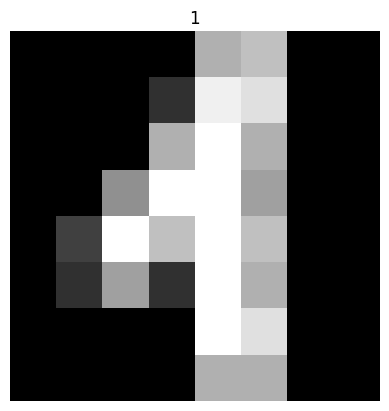

In [81]:
# image 확인
img_index = 200
img = X[img_index].reshape(8, 8)
plt.imshow(img, cmap='gray')  # imshow(): image 출력 함수. 
plt.title(y[img_index])
plt.axis('off')  # spine을 제거
plt.show()

### 불균형 데이터셋으로 만들기
이미지를 0 ~ 9 로 분류하는 문제를 위한 데이터셋 ===> 9와 나머지 숫자로 분류하는 데이터셋으로 변환 
- 이미지의 숫자가 9인지를 물어보는 문제로 만든다. (2진 분류)
- y를 9와 나머지로 변경한다.
- Positive(양성 - 1): 9
- Negative(음성 - 0): 0 ~ 8

In [82]:
y = np.where(y == 9, 1, 0)  # (조건, True변환값, False변환값) 

In [83]:
print(np.unique(y, return_counts=True))
print(np.unique(y, return_counts=True)[1]/y.size)

(array([0, 1]), array([1617,  180], dtype=int64))
[0.89983306 0.10016694]


### 데이터셋 분할
- train/test 로 분할

In [84]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

In [85]:
X_train.shape, X_test.shape

((1347, 64), (450, 64))

In [86]:
1347/1797, 450/1797

(0.7495826377295493, 0.25041736227045075)

### 모델 생성 및 학습

#### Dummy Model 정의
- dummy model: 진짜 모델이 아니라 모델을 흉내낸 모델을 말한다.
- Target Label중 무조건 최빈값으로 예측하는 모델을 정의한다.

In [87]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

In [88]:
 #  y의 최빈값으로 무조건 추론 하는 Dummy Model 생성
dummy_model = DummyClassifier(strategy='most_frequent') 
dummy_model.fit(X_train, y_train) # 최빈값 찾기

#정확도 검증
pred_train = dummy_model.predict(X_train) # 최빈값으로 추론
pred_test = dummy_model.predict(X_test)

print("train 정확도:", accuracy_score(y_train, pred_train))
print("test 정확도:", accuracy_score(y_test, pred_test))

train 정확도: 0.8997772828507795
test 정확도: 0.9


In [89]:
print(np.unique(pred_train, return_counts=True))
print(np.unique(pred_test, return_counts=True))

(array([0]), array([1347], dtype=int64))
(array([0]), array([450], dtype=int64))


모델이 단순히 다수 class를 정답으로 예측 했는데 정확도 90%의 괜찮은 성능이 나왔다.  
그럼 이 모델은 좋은 모델일까?   
이 모델이 무조건 **0**(9가 아님)으로만 추론하기 때문문에 우리가 찾으려는 대상(positive)이 9는 하나도 분류해 내지 못하는 모델이다.     
그래서 정확도만으로 모델의 성능을 판단해서는 안된다. 특시 **불균형 레이블 데이터세트**의 평가지표로 정확도만 보면 안된다. **Class별 성능을 확인할 수있는 평가지표가 필요하다.**

## 혼동 행렬(Confusion Marix)
- 실제 값(정답)과 예측 한 것을 표로 만든 평가표
    - 분류의 예측 결과가 몇개나 맞고 틀렸는지를 확인할 때 사용한다.
- 함수: confusion_matrix(정답, 모델예측값)
- **0번축:** 실제(정답) class, **1번축:** 예측 class, **cell:** 개수

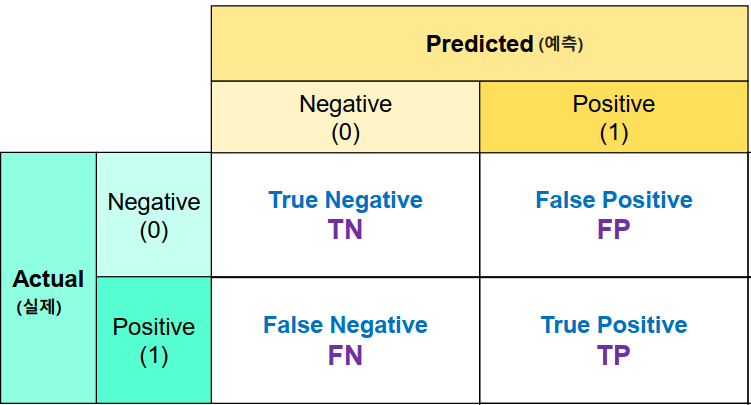

- **TP(True Positive)** 
    - 양성으로 예측했는데 맞은 개수
- **TN(True Negative)** 
    - 음성으로 예측했는데 맞은 개수
- **FP(False Positive)** 
    - 양성으로 예측했는데 틀린 개수 
    - 음성을 양성으로 예측
- **FN(False Negative)** 
    - 음성으로 예측했는데 틀린 개수 
    - 양성을 음성으로 예측

- 예)
```python
[[20, 6],
 [4,  40]]
```

## 이진 분류 평가지표

- **Accuracy (정확도)** 
    - 전체 데이터 중에 맞게 예측한 것의 비율
    - Accuracy(정확도)는 이진분류 뿐아니라 모든 분류의 기본 평가방식이다.
    
### 양성(Positive) 예측력 측정 평가지표

- **Recall/Sensitivity(재현율/민감도)** 
    - 실제 Positive(양성)인 것 중에 Positive(양성)로 예측 한 것의 비율
    - **TPR**(True Positive Rate) 이라고도 한다.
    - ex) 스팸 메일 중 스팸메일로 예측한 비율. 금융사기 데이터 중 사기로 예측한 비율
- **Precision(정밀도)**
    - Positive(양성)으로 예측 한 것 중 실제 Positive(양성)인 비율
    - **PPV**(Positive Predictive Value) 라고도 한다.
    - ex) 스팸메일로 예측한 것 중 스팸메일의 비율. 금융 사기로 예측한 것 중 금융사기인 것의 비율

- **F1 점수**
    - 정밀도와 재현율의 조화평균 점수
    - recall과 precision이 비슷할 수록 높은 값을 가지게 된다. F1 score가 높다는 것은 recall과 precision이 한쪽으로 치우쳐저 있이 않고 둘다 좋다고 판단할 수 있는 근거가 된다.

### 음성(Negative) 예측력 측정 평가지표
- **Specificity(특이도)**
    - 실제 Negative(음성)인 것들 중 Negative(음성)으로 맞게 예측 한 것의 비율
    - **TNR**(True Negative Rate) 라고도 한다.
- **Fall out(위양성률)**
    - 실제 Negative(음성)인 것들 중 Positive(양성)으로 잘못 예측한 것의 비율. `1 - 특이도`
    - **FPR** (False Positive Rate) 라고도 한다.
    - $Fall Out(FPR) = \cfrac{FP}{TN+FP}$

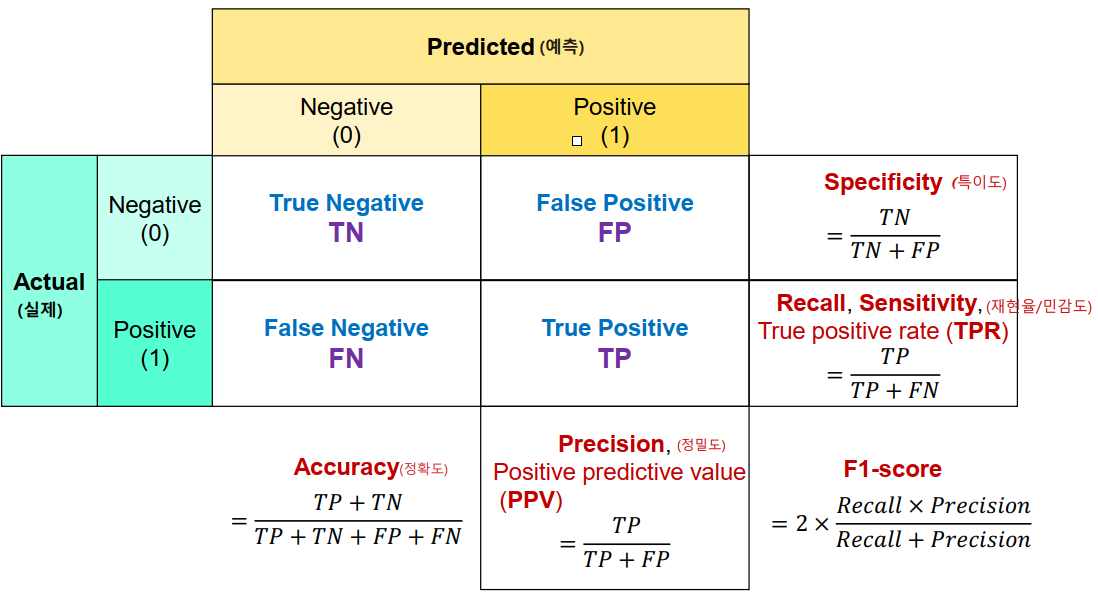

## 각 평가 지표 계산 함수
- sklearn.metrics 모듈
- **confusion_matrix(y 실제값, y 예측값),  ConfusionMatrixDisplay(Confusion marix 시각화클래스)**
    - 혼돈 행렬 반환
- **recall_score(y 실제값, y 예측값)**
  - Recall(재현율) 점수 반환 (Positive 중 Positive로 예측한 비율 (TPR))
- **precision_score(y 실제값, y 예측값)**
  - Precision(정밀도) 점수 반환 (Positive로 예측한 것 중 Positive인 것의 비율 (PPV))
- **f1_score(y 실제값, y 예측값)**
    - F1 점수 반환 (recall과 precision의 조화 평균값)
- **classification_report(y 실제값, y 예측값)**
    - 클래스 별로 recall, precision, f1 점수와 accuracy를 종합해서 보여준다.

###   Dummy 모델 혼동행렬

In [90]:
from sklearn.metrics import (confusion_matrix, ConfusionMatrixDisplay,
                             recall_score, precision_score,
                             f1_score, accuracy_score)

In [91]:
# 정확도
print(accuracy_score(y_train, pred_train))
print(accuracy_score(y_test, pred_test))

0.8997772828507795
0.9


In [92]:
print("confusion matrix")
print('train')
print(confusion_matrix(y_train, pred_train))
print("-"*50)
print('test')
print(confusion_matrix(y_test, pred_test))

confusion matrix
train
[[1212    0]
 [ 135    0]]
--------------------------------------------------
test
[[405   0]
 [ 45   0]]


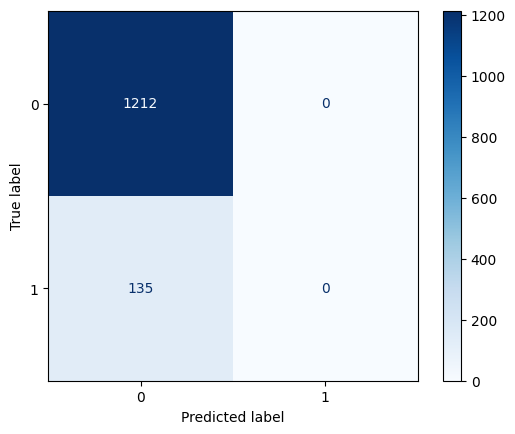

In [93]:
# confusion matrix 계산 결과 시각화.
# confusion matrix 계산 결과를 넣어서 객체 생성
disp = ConfusionMatrixDisplay(confusion_matrix(y_train, pred_train))
disp.plot(cmap='Blues')
plt.show()

### dummy 모델 Accuracy, Recall, Precision, F1-Score

In [94]:
recall_score(y_train, pred_train),  recall_score(y_test, pred_test)

(0.0, 0.0)

In [95]:
precision_score(y_train, pred_train),  precision_score(y_test, pred_test)

C:\Users\Playdata\anaconda3\envs\ml\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Playdata\anaconda3\envs\ml\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


(0.0, 0.0)

In [96]:
f1_score(y_train, pred_train),  f1_score(y_test, pred_test)

(0.0, 0.0)

### classification_report()
- Accuracy와 각 class가 Positive일 때의 recall, precision, f1-score를 한번에 보여주는 함수

In [97]:
from sklearn.metrics import classification_report

report = classification_report(y_train, pred_train)
print(report)

              precision    recall  f1-score   support

           0       0.90      1.00      0.95      1212
           1       0.00      0.00      0.00       135

    accuracy                           0.90      1347
   macro avg       0.45      0.50      0.47      1347
weighted avg       0.81      0.90      0.85      1347



C:\Users\Playdata\anaconda3\envs\ml\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Playdata\anaconda3\envs\ml\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Playdata\anaconda3\envs\ml\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### 머신 모델을 이용해 학습
- DecisionTreeClassifier 사용 (max_depth=3)
- RandomForestClassifier 사용 (n_estimators=100, max_depth=3)

In [98]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [99]:
%%writefile metrics.py
# 평가지표 저장 모듈

__version__ = 1.0
import matplotlib.pyplot as plt
from sklearn.metrics import (confusion_matrix, ConfusionMatrixDisplay, recall_score,
                             precision_score, f1_score, accuracy_score)

def plot_confusion_matrix(y, pred, title=None):
    """
    Confusion Matrix 시각화 함수
    [parameter]
        y: ndarray -  정답
        pred: ndarray -  모델 예측값
        title: str - 그래프 제목
    [return]
    [exception]
    """
    cm = confusion_matrix(y, pred)
    disp = ConfusionMatrixDisplay(cm)
    disp.plot(cmap='Blues')
    if title:
        plt.title(title)
    plt.show()
    
def print_metrics_classification(y, pred, title=None):
    """
    classification(분류) 결과들을 출력하는 함수
    accuracy, recall, precision, f1-score
    [parameter]
        y: ndarray -  정답
        pred: ndarray -  모델 예측값
        title: str - 그래프 제목
    [return]
    [exception]
    """
    if title:
        print(title)
    print("정확도(accuracy):", accuracy_score(y, pred))
    print("재현율/민감도(recall):", recall_score(y, pred))
    print("정밀도(precision):", precision_score(y, pred))
    print('F1-score:', f1_score(y, pred))

Overwriting metrics.py


In [100]:
import metrics
from metrics import print_metrics_classification, plot_confusion_matrix

In [101]:
metrics.__version__

1.0

In [102]:
# 모델 생성
tree = DecisionTreeClassifier(max_depth=3, random_state=0)
rfc = RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0)

# 학습
tree.fit(X_train, y_train)
rfc.fit(X_train, y_train)

# 검증
## 추론
pred_train_tree = tree.predict(X_train)
pred_test_tree = tree.predict(X_test)

pred_train_rfc = rfc.predict(X_train)
pred_test_rfc = rfc.predict(X_test)

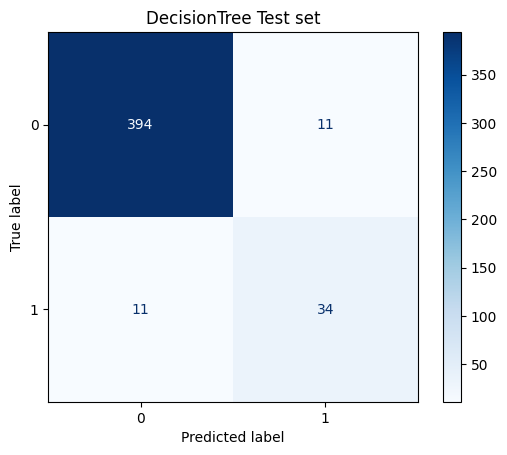

In [103]:
# confusion matrix
plot_confusion_matrix(y_test, pred_test_tree, "DecisionTree Test set")

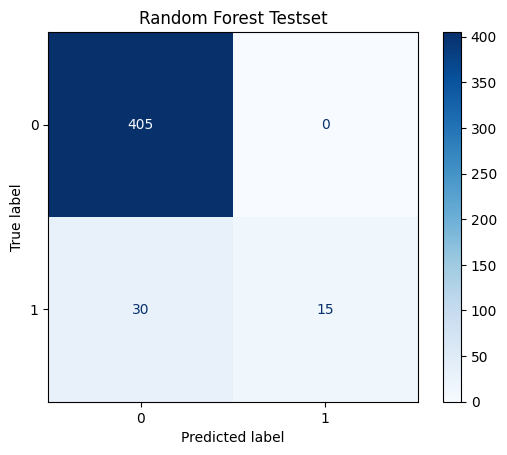

In [104]:
plot_confusion_matrix(y_test, pred_test_rfc, title="Random Forest Testset")

In [105]:
print('##########Decision Tree 검증 결과#############')
print_metrics_classification(y_train, pred_train_tree, title='Train set')
print("="*100)
print_metrics_classification(y_test, pred_test_tree, title='Test set')

##########Decision Tree 검증 결과#############
Train set
정확도(accuracy): 0.9465478841870824
재현율/민감도(recall): 0.8
정밀도(precision): 0.7058823529411765
F1-score: 0.75
Test set
정확도(accuracy): 0.9511111111111111
재현율/민감도(recall): 0.7555555555555555
정밀도(precision): 0.7555555555555555
F1-score: 0.7555555555555555


In [106]:
print('############Random Forest 검증 결과##############')
print_metrics_classification(y_train, pred_train_rfc, title='Train set')
print('=' * 100)
print_metrics_classification(y_test, pred_test_rfc, title='Test set')

############Random Forest 검증 결과##############
Train set
정확도(accuracy): 0.9354120267260579
재현율/민감도(recall): 0.35555555555555557
정밀도(precision): 1.0
F1-score: 0.5245901639344263
Test set
정확도(accuracy): 0.9333333333333333
재현율/민감도(recall): 0.3333333333333333
정밀도(precision): 1.0
F1-score: 0.5


## 재현율과 정밀도의 관계

**이진 분류의 경우 Precision(정밀도)가 중요한 경우와 Recall(재현율) 중요한 업무가 있다.**

### 재현율이 더 중요한 경우
- 실제 Positive 데이터를 Negative 로 잘못 판단하면 업무상 큰 영향이 있는 경우. 
- FN(False Negative)를 낮추는데 촛점을 맞춘다.
- 암환자 판정 모델, 보험사기적발 모델

### 정밀도가 더 중요한 경우
- 실제 Negative 데이터를 Positive 로 잘못 판단하면 업무상 큰 영향이 있는 경우.
- FP(False Positive)를 낮추는데 초점을 맞춘다.
- 스팸메일 판정

## 결과 후처리를 이용해 재현율 또는 정밀도 성능 올리기

- Positive(1)일 확률에 대한 임계값(Threshold) 변경을 통한 재현율, 정밀도를 올릴 수 있다.
- **결과 후처리시 임계값(Threshold) 변경**
    - 분류 모델은 입력값에 대해 class별 확률을 예측 한다. 그 출력된 확률값이 높은 class를 정답 class로 처리한다. 
    - **이진 분류**의 경우 모델은 양성(Positive)일 확률을 출력한다. 
    - **결과 후처리**
        - 이진 분류 모델이 출력한 양성일 확률에서 양성과 음성을 나누는 임계값(Threshold)을 정하고 그 임계값 이하일 경우 음성, 초과일 경우 양성으로 class를 정한다. 이 작업은 결과 후처리에서 진행한다.
        - 그 임계값을 무엇으로 하느냐에 따라 재현율과 정밀도가 변경된다. (기본: 0.5)
    - 모델의 재현율이나 정밀도 성능을 높이기 위해 **후처리 작업에서 사용하는 임계값(threshold)를 변경한다.**
        - 단 임계값(threshold)를 변경해서 하나의 성능을 올라가면 다른 하나는 떨어진다. 즉 **재현율과 정밀도의 임계값 변경에 따른 성능변화는 반비례한다.**
        - 그래서 극단적으로 임계점을 변경해서 한쪽의 점수를 높이면 안된다.
            - 예: 환자 여부 예측시 재현율을 너무 높이면 정밀도가 낮아져 걸핏하면 정상인을 환자로 예측하게 된다.

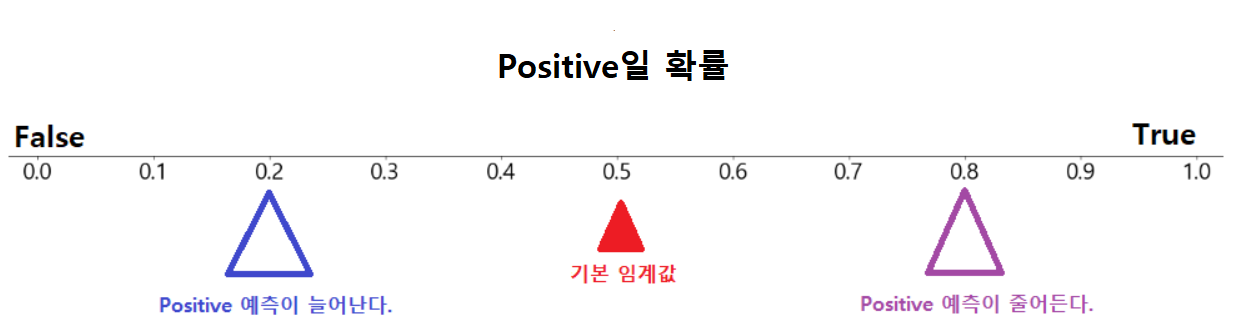

- Positive일 확률이 임계값 이상이면 Positive, 미만이면 Negative로 예측한다.

### 임계값 변경에 따른  정밀도와 재현율 변화관계
- 임계값을 높이면 양성으로 예측하는 기준을 높여서(엄격히 해서) 음성으로 예측되는 샘플이 많아 진다. 그래서 정밀도는 높아지고 재현율은 낮아진다.
- 임계값을 낮추면 양성으로 예측하는 기준이 낮아져서 양성으로 예측되는 샘플이 많아 진다. 그래서 재현율은 높아지고 정밀도는 낮아진다.
- 정리
    - **임계값을 낮추면 재현율은 올라가고 정밀도는 낮아진다.**
    - **임계값을 높이면 재현율은 낮아지고 정밀도는 올라간다.**
- 임계값을 변화시켰을때 **재현율과 정밀도는 반비례 관계를 가진다.**
- 임계값을 변화시켰을때 **재현율과 위양성율(Fall-Out/FPR)은 비례 관계를 가진다.**

### 임계값 변화에 따른 recall, precision 변화

##### 분류 모델의 추론 메소드
- model.predict(X)
    - 추론한 X의 class를 반환
- model.predict_proba(X)
    - 추론한 X의 class별 확률을 반환

In [107]:
y_test[:5]

array([0, 0, 0, 0, 0])

In [108]:
tree.predict(X_test[:5])

array([0, 0, 0, 0, 0])

In [109]:
r = tree.predict_proba(X_test[:5])
print(r.shape)
r

(5, 2)


array([[0.99173554, 0.00826446],
       [0.98695652, 0.01304348],
       [0.98695652, 0.01304348],
       [0.98695652, 0.01304348],
       [0.98695652, 0.01304348]])

In [110]:
r[:, 1] # positive의 확률

array([0.00826446, 0.01304348, 0.01304348, 0.01304348, 0.01304348])

In [111]:
# 임계값에 따른 결과 후처리
th = 0.01
# th = 0.5
np.where(r[:, 1] > th, 1, 0)

array([0, 1, 1, 1, 1])

In [112]:
th = 0.01
pos_proba = rfc.predict_proba(X_test)[:, 1]
y_pred = np.where(pos_proba > th, 1, 0)

In [113]:
print_metrics_classification(y_test, y_pred)

정확도(accuracy): 0.15555555555555556
재현율/민감도(recall): 1.0
정밀도(precision): 0.10588235294117647
F1-score: 0.19148936170212766


In [114]:
th = 0.3
pos_proba = rfc.predict_proba(X_test)[:, 1]
y_pred = np.where(pos_proba > th, 1, 0)
print_metrics_classification(y_test, y_pred)

정확도(accuracy): 0.9622222222222222
재현율/민감도(recall): 0.6888888888888889
정밀도(precision): 0.9117647058823529
F1-score: 0.7848101265822784


##### 임계값 변화에 따른 recall/precision 확인
- **precision_recall_curve(y_정답, positive_예측확률)** 이용
    - 반환값: Tuple - (precision리스트, recall리스트, threshold리스트) 
        - threshold(임계값) 0에서 1까지 변경하며 변화되는 precsion과 recall값을 반환

In [115]:
from sklearn.metrics import precision_recall_curve

# 모델 추론 - class별 확률값 ==> 양성일 확률 추룰
pos_proba_test = tree.predict_proba(X_test)[:, 1]   # [음성확률, 양성확률] => 양성확률만 추출

# Precision Recall Curve 계산
# 정답, 모델이 추론한 pos 확률
precisions, recalls, thresholds = precision_recall_curve(y_test, pos_proba_test)

precisions.shape, recalls.shape, thresholds.shape

((8,), (8,), (7,))

In [116]:
thresholds = np.append(thresholds, 1)

In [117]:
thresholds

array([0.00826446, 0.01304348, 0.03389831, 0.04      , 0.14925373,
       0.54545455, 0.75      , 1.        ])

In [118]:
precisions

array([0.1       , 0.10757946, 0.43181818, 0.51388889, 0.56060606,
       0.75555556, 0.82352941, 1.        ])

In [119]:
recalls

array([1.        , 0.97777778, 0.84444444, 0.82222222, 0.82222222,
       0.75555556, 0.62222222, 0.        ])

In [120]:
import pandas as pd

prc_df = pd.DataFrame({
    "Threshold":thresholds, 
    "Recall":recalls,
    "Precisions":precisions
})
prc_df

,Threshold,Recall,Precisions
0,0.008264,1.000000,0.100000
1,0.013043,0.977778,0.107579
2,0.033898,0.844444,0.431818
3,0.040000,0.822222,0.513889
4,0.149254,0.822222,0.560606
5,0.545455,0.755556,0.755556
6,0.750000,0.622222,0.823529
7,1.000000,0.000000,1.000000


###### plotting

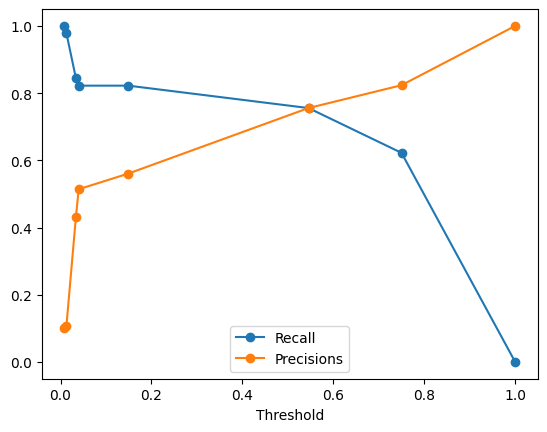

In [121]:
## precision, recall 변화 확인
prc_df.set_index('Threshold').plot(marker='o')
plt.show()

## PR Curve(Precision Recall Curve-정밀도 재현율 곡선)와 AP Score(Average Precision Score)
- 이진분류의 평가지표. 
- Positive 확률을 이용해 class(0, 1)을 결정할 때 임계값이 변화에 따른 재현율과 정밀도의 변화를 이용해 모델의 성능을 평가한다. 
    - 재현율이 변화할 때 정밀도가 어떻게 변화하는지 평가한다.
- Precision과 Recall 값들을 이용해 모델을 평가하는 것으로 모델의 Positive에 대한 성능의 강건함(robust)를 평가한다.
- **X축에 재현율, Y축에 정밀도를** 놓고 임계값이 1 → 0 변화할때 두 값의 변화를 선그래프로 그린다.
- AP Score
    - PR Curve의 성능평가 지표를 하나의 점수(숫자)로 평가한것.
    - PR Curve의 선아래 면적을 계산한 값으로 높을 수록 성능이 우수하다.
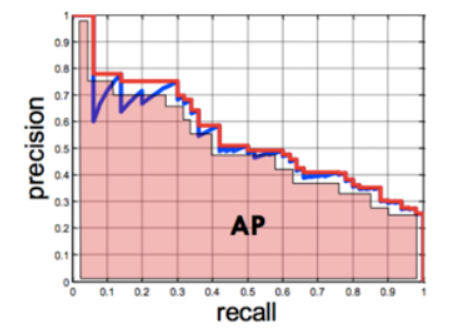   

0.6766948888666132


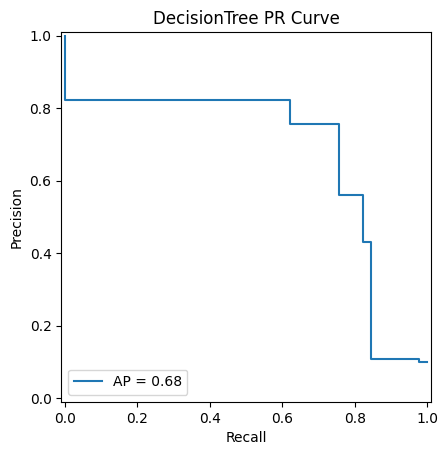

In [122]:
from sklearn.metrics import PrecisionRecallDisplay 
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

import matplotlib.pyplot as plt

#  Positive 확률
test_proba_tree = tree.predict_proba(X_test)[:, 1]  # DecisionTreeClassifier
test_proba_rfc = rfc.predict_proba(X_test)[:, 1]    # RandomForestClassifier

### DecisionTreeClassifier 모델 결과
ap_score_tree = average_precision_score(y_test, test_proba_tree)  
print(ap_score_tree)

precisions1, recalls1, threshs1 = precision_recall_curve(y_test, test_proba_tree)
disp_tree = PrecisionRecallDisplay(precisions1, recalls1, 
                                   average_precision=ap_score_tree)  # ap score값
disp_tree.plot()

plt.title('DecisionTree PR Curve')
plt.show()

0.8775487970449385


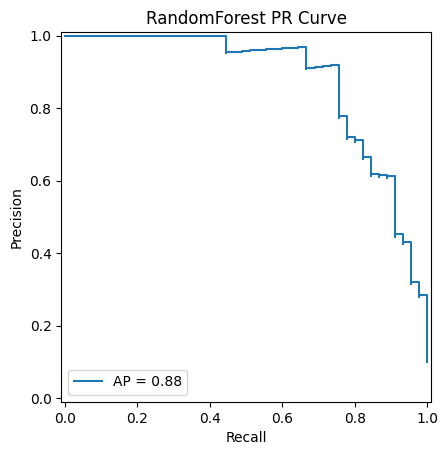

In [123]:
### RandomForestClassifier 모델 결과
test_proba_rfc = rfc.predict_proba(X_test)[:, 1]  #양성 확률 값
ap_score_rfc = average_precision_score(y_test, test_proba_rfc) # AP SCORE
print(ap_score_rfc)

# precision, recall 점수들을 조회
precisions2, recalls2, _ = precision_recall_curve(y_test, test_proba_rfc)

# precisions2.shape
disp_rfc = PrecisionRecallDisplay(precisions2, recalls2, average_precision=ap_score_rfc)
disp_rfc.plot()
plt.title('RandomForest PR Curve')
plt.show()

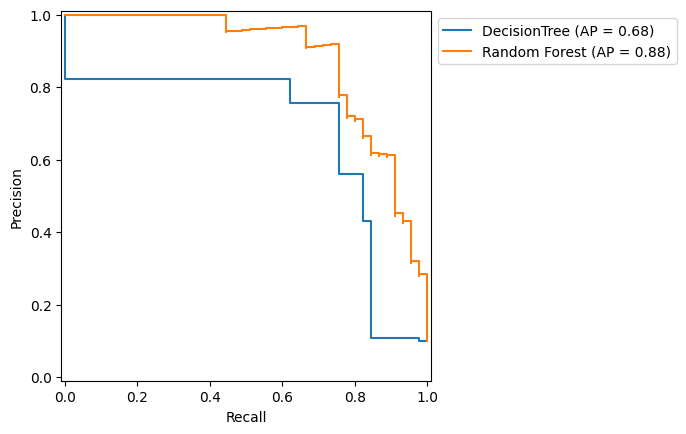

In [124]:
# 시각화

ax = plt.gca()  # subplot(axes)를 조회.

disp_tree = PrecisionRecallDisplay(precisions1, recalls1, average_precision=ap_score_tree,
                                  estimator_name='DecisionTree') # 범례에 나올 이름.
disp_rfc = PrecisionRecallDisplay(precisions2, recalls2, average_precision=ap_score_rfc, 
                                 estimator_name='Random Forest')

disp_tree.plot(ax=ax)  #ax=ax : 그래프를 그릴 subplot을 지정.
disp_rfc.plot(ax=ax)
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.show()

## ROC curve(Receiver Operating Characteristic Curve)와 AUC(Area Under the Curve) score

- **FPR(False Positive Rate-위양성율)**
    - 위양성율 (fall-out)
    - 1-특이도(TNR)
    - 실제 음성중 양성으로 잘못 예측 한 비율
    $$
    \cfrac{FP}{TN+FP}
    $$
- **TPR(True Positive Rate-재현율/민감도)** 
    - 재현율(recall)
    - 실제 양성중 양성으로 맞게 예측한 비율
    $$
    \frac{TP}{FN+TP}
    $$

- **ROC Curve**
    - 2진 분류의 모델 성능 평가 지표 중 하나.
    - FPR을 X축, TPR을 Y축으로 놓고 임계값을 변경해서 FPR이 변할 때 TPR이 어떻게 변하는지 나타내는 곡선.
    - FPR과 TPR의 변화는 비례해서 변화한다.
        - 낮은 임계값에서 큰 임계값으로 변경하면 높은 값에서 낮은 값으로 같이 변화한다.

- **AUC Score**
    - ROC Curve의 결과를 점수화(수치화) 하는 함수로 ROC Curve 아래쪽 면적을 계산한다.
    - 0 ~ 1 사이 실수로 나오며 클수록 좋다.
        - AUC Score값이 크려면(1에 가까운 값) 임계값이 클 때 FPR은 작고, TPR의 값은 커야 한다. FPR이 작다는 것은 Negative 잘 분류했다는 것이고 TPR이 크다는 것은 Positive를 잘 분류 했다는 의미이므로 둘에 대한 분류성능이 좋다는 것을 의미한다.
   - **AUC 점수기준**
        - 1.0 ~ 0.9 : 아주 좋음
        - 0.9 ~ 0.8 : 좋음
        - 0.8 ~ 0.7 : 괜찮은 모델
        - 0.7 ~ 0.6 : 의미는 있으나 좋은 모델은 아님
        - 0.6 ~ 0.5 : 좋지 않은 모델

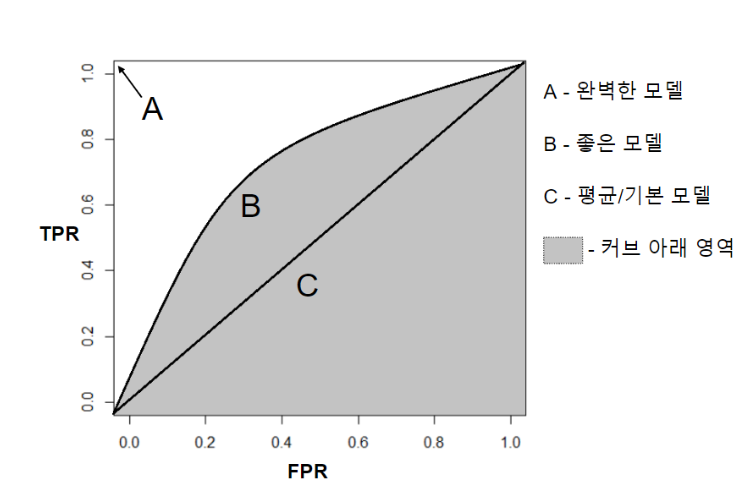

가장 완벽한 것은 FPR이 0이고 TPR이 1인 것이다. 
일반 적으로 FPR이 작을 때 (0에 가까울때) TPR이 높은 경우가 좋은 상황이다. 그래서 선 아래의 면적이 넓은 곡선이 나올 수록 좋은 모델이다.

### ROC, AUC 점수  확인
- roc_curve(y값, Pos_예측확률) : FPR, TPR, Thresholds (임계치)
- roc_auc_score(y값, Pos_예측확률) : AUC 점수 반환

## ROC Curve / Precision_Recall Curve
- **ROC Curve/ROC-AUC score**
    - 이진분류에서 양성클래스 탐지와 음성클래스 탐지의 중요도가 비슷할 때 사용(개고양이 분류)
- **Precision Recall Curve/AP Score**
    - 양성클래스 탐지가 음성클래스 탐지의 중요도보다 높을 경우 사용(암환자 진단)

In [125]:
# ROC Curve 시각화
from sklearn.metrics import roc_curve, RocCurveDisplay, roc_auc_score

# threshold변화에 따른 fpr과 tpr값들을 조회 - roc_curve
fprs1, tprs1, thresh1  = roc_curve(y_test, test_proba_tree)  # (y-정답라벨, 양성예측확률)
print(fprs1.shape, tprs1.shape, thresh1.shape)
fprs2, tprs2, thresh2 = roc_curve(y_test, test_proba_rfc)
print(fprs2.shape, tprs2.shape, thresh2.shape)

(8,) (8,) (8,)
(30,) (30,) (30,)


In [126]:
pd.DataFrame({'임계값':thresh1, 'FPR':fprs1, 'TPR':tprs1})  #TPR-Recall

,임계값,FPR,TPR
0,inf,0.000000,0.000000
1,0.750000,0.014815,0.622222
2,0.545455,0.027160,0.755556
3,0.149254,0.071605,0.822222
4,0.040000,0.086420,0.822222
5,0.033898,0.123457,0.844444
6,0.013043,0.901235,0.977778
7,0.008264,1.000000,1.000000


In [127]:
pd.DataFrame({'임계값':thresh2, 'FPR':fprs2, 'TPR':tprs2}) 

,임계값,FPR,TPR
0,inf,0.000000,0.000000
1,0.644297,0.000000,0.022222
2,0.453446,0.000000,0.444444
3,0.447451,0.002469,0.444444
4,0.327547,0.002469,0.666667
5,0.321028,0.007407,0.666667
6,0.282455,0.007407,0.755556
7,0.240723,0.024691,0.755556
8,0.238526,0.024691,0.777778
9,0.217295,0.034568,0.777778


0.8975308641975308


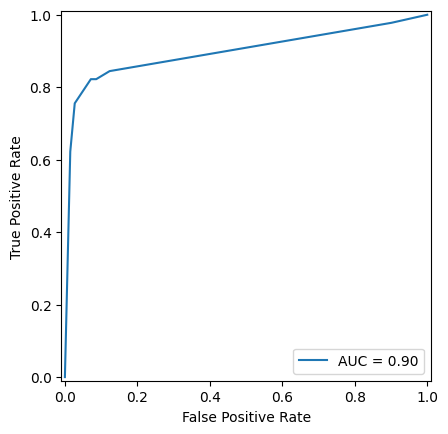

In [128]:
roc_auc_tree = roc_auc_score(y_test, test_proba_tree)
print(roc_auc_tree)
disp_roc_tree = RocCurveDisplay(fpr=fprs1, tpr=tprs1, 
                                roc_auc=roc_auc_tree)
disp_roc_tree.plot()
plt.show()

0.9742661179698217


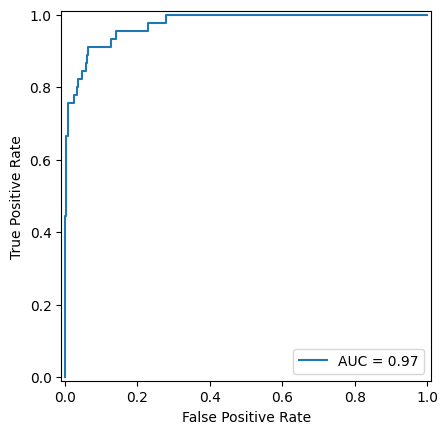

In [129]:
roc_auc_rfc = roc_auc_score(y_test, test_proba_rfc)
print(roc_auc_rfc)
disp_roc_rfc = RocCurveDisplay(fpr=fprs2, tpr=tprs2, roc_auc=roc_auc_rfc)
disp_roc_rfc.plot()
plt.show()

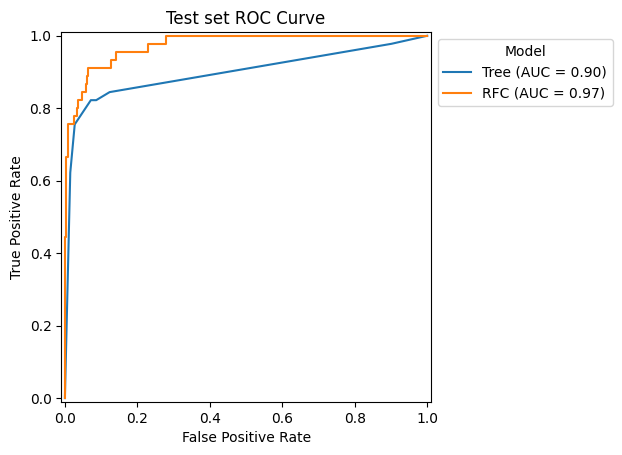

In [130]:
# tree, rfc roc 커브를 하나의 subplot(axes)에 그리기.
ax = plt.gca()
disp_roc_tree2 = RocCurveDisplay(fpr=fprs1, tpr=tprs1, roc_auc=roc_auc_tree, estimator_name='Tree')
disp_roc_rfc2= RocCurveDisplay(fpr=fprs2, tpr=tprs2, roc_auc=roc_auc_rfc, estimator_name='RFC')
disp_roc_tree2.plot(ax=ax)
disp_roc_rfc2.plot(ax=ax)

plt.title('Test set ROC Curve')
plt.legend(bbox_to_anchor=(1,1), loc='upper left', title='Model')
plt.show()

# 회귀(Regression) 평가지표

예측할 값(Target)이 연속형(continuous) 데이터인 지도 학습(Supervised Learning).

## 회귀의 주요 평가 지표

- ### MSE (Mean Squared Error)
    - 실제 값과 예측값의 차를 제곱해 평균 낸 것
    - scikit-learn 평가함수: mean_squared_error() 
    - 교차검증시 지정할 문자열: 'neg_mean_squared_error'
    $$
    MSE = \frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y_i})^2\\
    y_i: 실제값, \hat{y_i}: 모델이 예측한 값
    $$
    

- ### RMSE (Root Mean Squared Error)
    - MSE는 오차의 제곱한 값이므로 실제 오차의 평균보다 큰 값이 나온다.  MSE의 제곱근이 RMSE이다.
    - mean_squared_error() 의 squared=False로 설정해서 계산. 또는 MSE를 구한 뒤 np.sqrt()로 제곱근을 구한다.
    - 교차검증시 지정할 문자열: 'neg_root_mean_squared_error'
    
    $$
    RMSE = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y_i})^2}
    $$
   

- ### $R^2$ (R square, 결정계수)
    - 결정계수는 회귀모델에서 Feature(독립변수)들이 Target(종속변수)를 얼마나 설명하는지를 나타내는 평가지표이다.
        - 평균으로 예측했을 때 오차(총오차) 보다 모델을 사용했을 때 얼마 만큼 더 좋은 성능을 내는지를 비율로 나타낸 값으로 계산한다.
        - 모델은 feature들을 이용해 값을 추론하므로 그 성능은 target에 대한 설명력으로 생각할 수 있다.
    - 1에 가까울 수록 좋은 모델.
    - scikit-learn 평가함수: r2_score()
    - 교차검증시 지정할 문자열: 'r2'
    $$
    R^2 = \cfrac{\sum_{i=1}^{n}(\hat{y_i}-\bar{y})^2}{\sum_{i=1}^{n}(y_i - \bar{y})^2}
    $$

- $y_i$ : i번째 정답 값, 
- $\hat{y_i}$ : i 번째 예측 값, 
- $\bar{y}$ : y의 평균    

## 예제

> #### Dataset 생성 함수
> - make_xxxxx() 함수
>     - 머신러닝 학습을 위한 dummy dataset 구현 함수
>     - 필요한 설정을 직접하여 테스트할 수 있는 데이터셋을 생성해준다.
> - make_regression(): 회귀 문제를 위한 dummy dataset 생성
> - make_classification(): 분류 문제를 위한 dummy dataset 생성

> #### Noise란 
>  같은 Feature를 가진 데이터포인트가 다른 label을 가지는 이유를 Noise(노이즈)라고 한다. 단 그 이유는 현재 상태에선 모른다. 예를 들어 나이란 Feature가 있고 구매량이란 target이 있을때 같은 나이인데 구매량이 다른 경우 그 이유를 우리는 알 수 없다. 그 차이를 만드는 나이 이외의 Feature가 있는데 그것이 수집이 되지 않은 것이다.  그래서 데이터 수집하고 전처리 할 때 그 이유가 되는 Feature를 찾아야 한다. 찾으면 성능이 올라가는 것이고 못찾으면 모르는 이유가 되어 모델 성능이 떨어진다. 

In [131]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_regression

In [132]:
# 회귀 데이터셋 생성
X, y = make_regression(n_samples=1000, # 데이터 개수
                       n_features=1,   # Feature(속성,컬럼)의 개수
                       n_informative=1,# label(y)에 영향을 주는 feature의 개수. n_features와 같거나 작은 정수를 사용.
                       noise=30, # 모델이 찾을수 없는 값의 범위. 0 ~ 30 사이의 랜덤실수를 생성된 y에 더한다. => 인정할수 있는 오차범위
                       random_state=0
                      )
X.shape, y.shape

((1000, 1), (1000,))

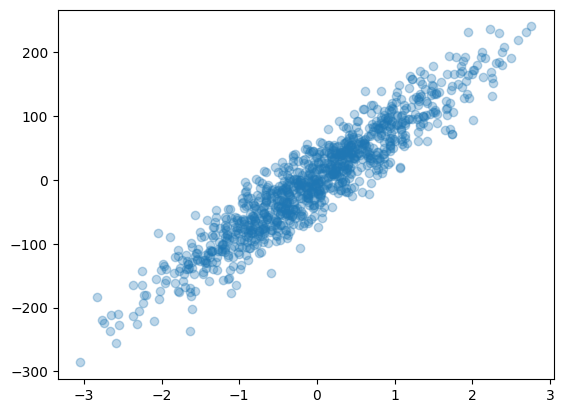

In [133]:
# X, y 관계 산점도를 이용해 시각화
plt.scatter(X, y, alpha=0.3)
plt.show()

In [134]:
# 상관계수 확인
np.corrcoef(X.flatten(), y) #상관계수

array([[1.        , 0.93856218],
       [0.93856218, 1.        ]])

In [135]:
# 모델링
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

In [136]:
# Train/Test 데이터셋 나누기
# stratify = y. 회귀에서는 하지 않음
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train.shape, X_test.shape

((800, 1), (200, 1))

In [137]:
# 모델 생성
tree = DecisionTreeRegressor(max_depth=3, random_state=0)
lr = LinearRegression()
# 학습
tree.fit(X_train, y_train)
lr.fit(X_train, y_train)

LinearRegression()

In [138]:
# DecisionTree 모델 추정
pred_train = tree.predict(X_train)
pred_test = tree.predict(X_test)

In [139]:
# LinearRegression 모델 추정
pred_train_lr = lr.predict(X_train)
pred_test_lr = lr.predict(X_test)

## 평가

In [140]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

print('Decision Tree 결과')
print('MSE:', mean_squared_error(y_train, pred_train))
print('RMSE:', mean_squared_error(y_train, pred_train, squared=False))
print("R2:", r2_score(y_train, pred_train))
print('MAE:', mean_absolute_error(y_train, pred_train))
print("========================")
print('MSE:', mean_squared_error(y_test, pred_test))
print('RMSE:', mean_squared_error(y_test, pred_test, squared=False))
print("R2:", r2_score(y_test, pred_test))
print('MAE:', mean_absolute_error(y_test, pred_test))

Decision Tree 결과
MSE: 999.7466989529054
RMSE: 31.61877130681876
R2: 0.8696021326641414
MAE: 25.606478239082954
MSE: 1057.6377039774145
RMSE: 32.521342284374036
R2: 0.8348442822143439
MAE: 26.12205620975511


C:\Users\Playdata\anaconda3\envs\ml\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Playdata\anaconda3\envs\ml\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [141]:
print("Linear Regression 결과")
print('MSE:', mean_squared_error(y_train, pred_train_lr))
print('RMSE:', mean_squared_error(y_train, pred_train_lr, squared=False))
print("R2:", r2_score(y_train, pred_train_lr))
print('MAE:', mean_absolute_error(y_train, pred_train_lr))
print("========================")
print('MSE:', mean_squared_error(y_test, pred_test_lr))
print('RMSE:', mean_squared_error(y_test, pred_test_lr, squared=False))
print("R2:", r2_score(y_test, pred_test_lr))
print('MAE:', mean_absolute_error(y_test, pred_test_lr))

Linear Regression 결과
MSE: 899.6108311038803
RMSE: 29.993513150411044
R2: 0.8826629445928171
MAE: 23.76770271361007
MSE: 832.1344100029423
RMSE: 28.846740023838784
R2: 0.8700578135014047
MAE: 23.047557435366105


C:\Users\Playdata\anaconda3\envs\ml\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Playdata\anaconda3\envs\ml\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


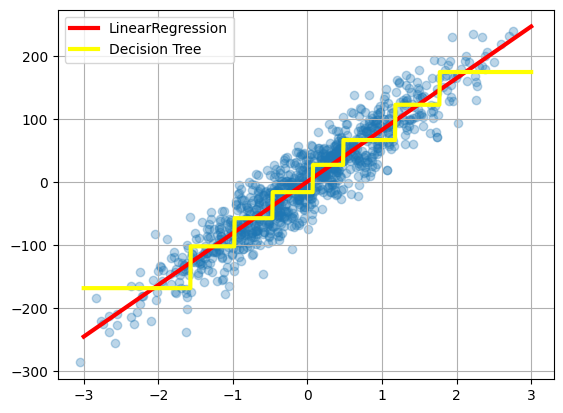

In [142]:
### 모델 추정 결과 시각화
### LinearRegression 추정결과를 시각화.
new_x = np.linspace(-3, 3, 1000)
new_y_lr = lr.predict(new_x.reshape(-1, 1))  
new_y_tree = tree.predict(new_x.reshape(-1, 1))

plt.scatter(X, y, alpha=0.3)
plt.plot(new_x, new_y_lr, color='red', linewidth=3, label="LinearRegression")
plt.plot(new_x, new_y_tree, color='yellow', linewidth=3, label="Decision Tree")
plt.legend()
plt.grid(True)
plt.show()

# 평가 함수 제공 모듈

In [144]:
%%writefile metrics.py

# 평가 함수들을 제공하는 모듈

__version__ = 1.1

import matplotlib.pyplot as plt
from sklearn.metrics import (confusion_matrix, 
                             ConfusionMatrixDisplay, 
                             recall_score, 
                             accuracy_score, 
                             precision_score, 
                             f1_score, 
                             average_precision_score, 
                             roc_auc_score, 
                             precision_recall_curve, 
                             PrecisionRecallDisplay, 
                             roc_curve, 
                             RocCurveDisplay, 
                             r2_score, 
                             mean_squared_error
                            )
def print_metrics_regression(y, pred, title=None):
    """
    회귀 평가지표를 출력하는 함수
    [parameter]
        y: ndarray - 정답
        pred: ndarray - 모델추론값
        title: 출력 제목
    """
    if title:
        print(f"============{title}============")
    print("MSE:", mean_squared_error(y, pred))
    print("RMSE:", mean_squared_error(y, pred, squared=False))
    print("R2:", r2_score(y, pred))


def plot_roc_curve(y, pos_proba, estimator_name, title=None):
    """
    Roc Curve를 시각화하는 함수
    [parameter]
        y: ndarray - 정답
        pos_proba: ndarray - 모델이 추정한 양성(positive)의 확률
        estimator_name: str - 범례(legend)에 나올 모델이름
    """
    auc_score = roc_auc_score(y, pos_proba)
    fpr, tpr, _ = roc_curve(y, pos_proba)
    RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc_score, 
                    estimator_name=estimator_name).plot()
    if title:
        plt.title(title)
    plt.show()

def plot_precision_recall_curve(y, pos_proba, estimator_name, title=None):
    """
    PrecisionRecall Curve를 시각화하는 함수
    [parameter]
        y: ndarray - 정답
        pos_proba: ndarray - 모델이 추정한 양성(positive)의 확률
        estimator_name: str - 범례(legend)에 나올 모델이름
    """
    ap_score = average_precision_score(y, pos_proba)
    precision_list, recall_list, _ = precision_recall_curve(y, pos_proba)
    PrecisionRecallDisplay(precision_list, recall_list, 
                           average_precision=ap_score, 
                           estimator_name=estimator_name).plot()
    if title:
        plt.title(title)
    plt.show()


def plot_confusion_matrix(y, pred, title=None):
    """
    confusion matrix를 시각화하는 함수
    [parameter]
        y:ndarray - 정답(ground truth)
        pred: ndarray - 모델이 추정한 값
        title: str - 그래프의 제목(title)
    """
    cm = confusion_matrix(y, pred)
    disp = ConfusionMatrixDisplay(cm)
    disp.plot(cmap='Blues')
    if title:
        plt.title(title)
    plt.show()
    
def print_metrics_classification(y, pred, pos_proba=None, title=None):  
    """
    분류 평갖치표 점수들을 출력하는 함수.
    accuracy, recall, precision, f1 score 
    average precision score, roc-auc score를 출력
    [parameter]
        y:ndarray - 정답
        pred:ndarray - 모델 추정값
        pos_proba:ndarry - 모델이 추정한 Positive의 확률. 
                           default: None - ap score, auc score 는 계산하지 않는다.
        title:str - 제목
    """
    if title:
        print(f"=========={title}==========")
    print(f"정확도(Accuracy): {accuracy_score(y, pred)}")
    print(f"재현율(Recall) : {recall_score(y, pred)}")
    print(f"정밀도(Precision): {precision_score(y, pred)}")
    print(f"F1 Score: {f1_score(y, pred)}")
    if pos_proba is not None:
        print(f"AveagePrecision Score: {average_precision_score(y, pos_proba)}")
        print(f"ROC-AUC Score: {roc_auc_score(y, pos_proba)}")


Overwriting metrics.py
